In [1]:
import pandas as pd
import logging
import torch
import pytorch_lightning as pl
from pathlib import Path
from torch.utils.data import DataLoader
import seisbench
import seisbench.models as sbm
from seisLM.evaluation import pick_eval

from seisLM.model import supervised_models

from seisLM.utils.project_path import gitdir
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# for data_name in data_aliases.keys():
pick_eval.save_pick_predictions(
    checkpoint_path_or_data_name='/home/liu0003/Desktop/projects/seisLM/train/weights/ethz_seisLM/version_7/checkpoints/epoch=1-step=706.ckpt',
    model_name='MultiDimWav2Vec2ForFrameClassification',
    targets=f'/home/liu0003/Desktop/projects/seisLM/targets/ethz',
    sets='dev,test',
    batchsize=64
)

2024-06-03 17:40:22,165 | seisbench | WARNING | Check available storage and memory before downloading and general use of ETHZ dataset. Dataset size: waveforms.hdf5 ~22Gb, metadata.csv ~13Mb
Preloading waveforms: 100%|██████████| 3632/3632 [00:00<00:00, 3763.18it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/MultiDimWav2Vec2ForFrameClassification_ethz/dev_task1.csv


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/MultiDimWav2Vec2ForFrameClassification_ethz/dev_task23.csv


Preloading waveforms: 100%|██████████| 10485/10485 [00:03<00:00, 3385.83it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/MultiDimWav2Vec2ForFrameClassification_ethz/test_task1.csv


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/MultiDimWav2Vec2ForFrameClassification_ethz/test_task23.csv


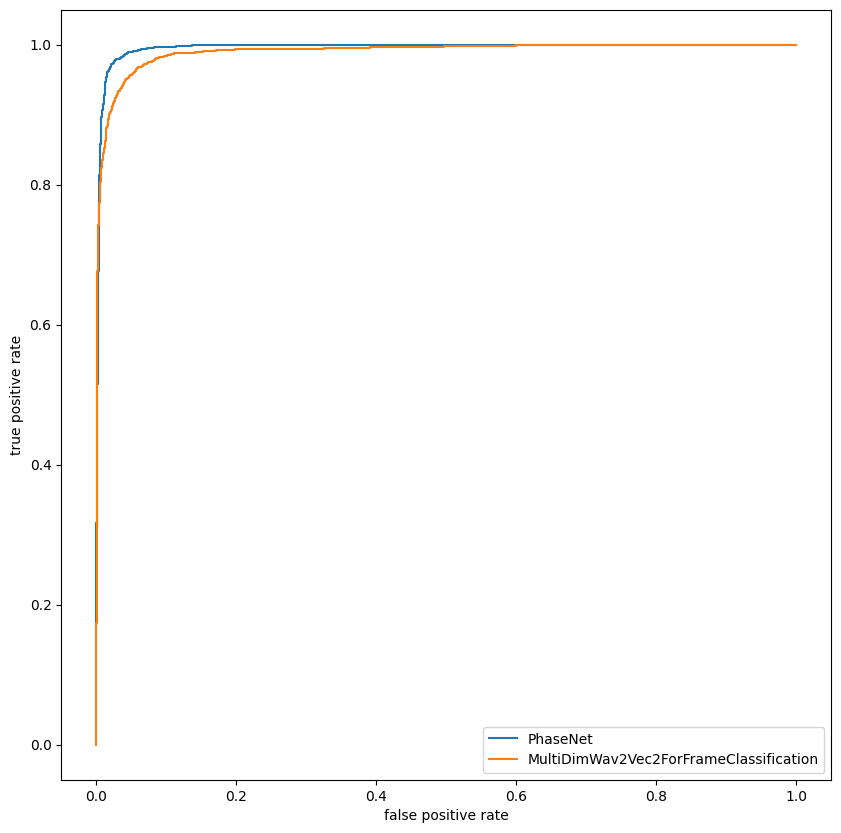

In [3]:
task = 1 # '23'
eval_set = 'dev' #'test'
model_name = 'PhaseNet'
data_name = 'ethz'
# for data_name in data_aliases.keys():

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for model_name in ['PhaseNet', 'MultiDimWav2Vec2ForFrameClassification']:
  pred_path = (
    Path(gitdir())
    / "evaluation_results"
    / f"{model_name}_{data_name}"
    / f"{eval_set}_task{task}.csv"
  )


  pred = pd.read_csv(pred_path)

  pred["trace_type_bin"] = pred["trace_type"] == "earthquake"

  fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])

  ax.plot(fpr, tpr, label=model_name)
  ax.set_aspect("equal")

  ax.set_xlabel("false positive rate")
  ax.set_ylabel("true positive rate")
  # ax.set_title(f"{model_name}; train: {data_name}; eval: {eval_set}-{task}")
plt.legend()